# Ejercicio - *Support Vector Machines*

En este ejercicio, utilizaremos máquinas de vectores soporte (*SVM*) para construir un clasificador de *spam*. Empezaremos con *SVM* en algunos conjuntos de datos 2D sencillos para ver cómo funcionan. A continuación, realizaremos un trabajo de preprocesamiento en un conjunto de correos electrónicos sin procesar y crearemos un clasificador en los correos electrónicos procesados utilizando un *SVM* para determinar si son *spam* o no.

Lo primero que vamos a hacer es examinar un simple conjunto de datos bidimensional y ver cómo funciona un *SVM* lineal en el conjunto de datos para distintos valores de *C* (similar al término de regularización en regresión lineal/logística). Vamos a cargar los datos.
## Ejercicio 1
#### 1. Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Carga de datos
Carga el archivo *ejer_1_data1.mat*. Encuentra la manera de cargar este tipo de archivos (pista: **scipy.io**).

In [2]:
from scipy.io import loadmat

mat = loadmat('data/ejer_1_data1.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

In [3]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

#### 3. Crea un DataFrame con las variables explicativas y la variable objetivo

In [3]:
df = pd.DataFrame(mat['X'], columns=['x1','x2'])
df['y'] = mat['y']
df.head()

,x1,x2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


In [5]:
df['y'].value_counts()

y
0    30
1    21
Name: count, dtype: int64

#### 4. Visualiza una gráfica de dispersión con los datos

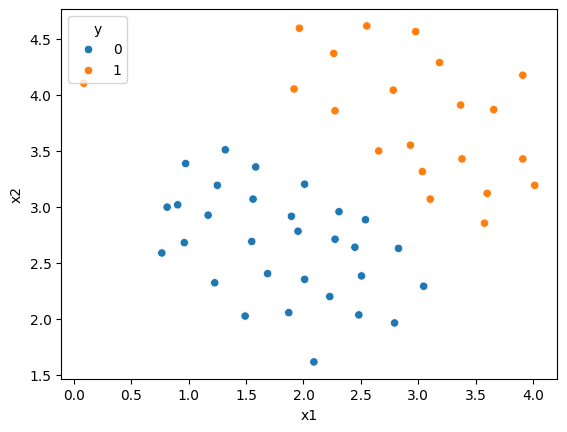

In [4]:
plt.figure()
sns.scatterplot(data=df, x='x1', y='x2', hue='y');

Observe que hay un ejemplo positivo atípico que se aparta de los demás. Las clases siguen siendo linealmente separables, pero el ajuste es muy estrecho. Vamos a entrenar una máquina lineal de vectores soporte para aprender el límite (la frontera) de la clase.

#### 5. LinearSVC
Declara un *Linear SVC* con los hiperparámetros:

```Python
LinearSVC(C=1, loss='hinge', max_iter=10000)
```

In [7]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1, loss='hinge', max_iter=10000)

#### 6. Evalua el modelo (*score*)
Para este primer experimento usaremos `C=1` y veremos cómo se ajusta.

In [8]:
X = df[['x1','x2']]
y = df['y']

In [9]:
svc.fit(X,y)
svc.score(X,y)

c:\Users\Bridgeschool37\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


0.9803921568627451

Parece que clasifica mal el *outlier*.

#### 7. Aumenta el valor de *C* hasta que obtengas un clasificador perfecto.

In [10]:
svc_2 = LinearSVC(C=350, loss='hinge', max_iter=10000, random_state=42)
svc_2.fit(X,y)
svc_2.score(X,y)

c:\Users\Bridgeschool37\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Bridgeschool37\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


1.0

Esta vez hemos obtenido una clasificación perfecta de los datos de entrenamiento, sin embargo, al aumentar el valor de C hemos creado un límite de decisión que ya no se ajusta naturalmente a los datos.  Podemos visualizar esto observando el nivel de confianza para cada predicción de clase, que es una función de la distancia del punto al hiperplano.

#### 8. Representar la función de decisión
Obtenga la salida de `decision_function()` para el primer modelo. Visualice un gráfico de dispersión con X1, X2 y un rango de colores basado en `decision_function()`.

In [11]:
conf_level = svc.decision_function(X)
conf_level

array([ 0.80286256,  0.38393706,  1.37752148,  0.52119243,  0.33342451,
        0.86872412,  0.6865459 ,  1.61123895,  0.83450905,  1.16716334,
        1.07326634,  0.22982735,  0.33185135,  0.79583718,  0.31582016,
        1.27412095,  1.21022065,  1.        ,  0.56476834,  0.38991655,
       -0.43520626, -0.30877875, -0.68619232, -0.5539506 , -0.33243744,
       -0.29376558, -0.44062718, -0.98391801, -0.68555883, -1.32841647,
       -1.00372552, -1.49225414, -0.61135452, -0.68338353, -0.99997877,
       -1.15268238, -1.57835657, -1.35593332, -1.03234399, -1.18499365,
       -0.77135849, -0.76686863, -0.46644207, -0.99992311, -0.51026159,
       -0.85856076, -1.55896323, -0.25481703, -1.11359805, -1.54714693,
       -0.7099055 ])

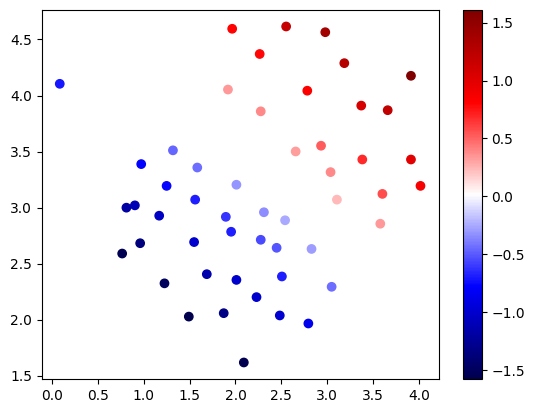

In [25]:
plt.scatter(df['x1'], df['x2'], c=conf_level, cmap='seismic')
plt.colorbar();

#### 9. Haz lo mismo con el segundo modelo

In [26]:
conf_level = svc_2.decision_function(X)
conf_level

array([  8.79154466,   4.44974424,  11.37728957,   4.09741156,
         0.96793843,   4.56177487,   4.47250186,  11.2102362 ,
         7.15094553,  10.55988766,   7.8359635 ,   1.17944568,
         4.83588745,   8.03020252,   2.97254044,   9.99998213,
         8.34343773,   5.93694478,   2.90997943,   2.72224166,
        -1.        ,  -0.90645192,  -4.0277156 ,  -3.64161671,
        -1.81152727,  -2.69078426,  -4.47018018,  -7.83628775,
        -5.3160907 ,  -9.37974534,  -6.90190896,  -9.28365015,
        -3.24730837,  -3.08703285,  -5.7914626 ,  -7.43244698,
       -10.64648849,  -7.48780082,  -5.18113991,  -5.66258373,
        -2.47145281,  -3.07963796,  -0.64946418,  -7.38125958,
        -3.66923193,  -7.48267643, -11.88087729,  -1.6809402 ,
        -5.26235643,  -8.67921687,   0.13422965])

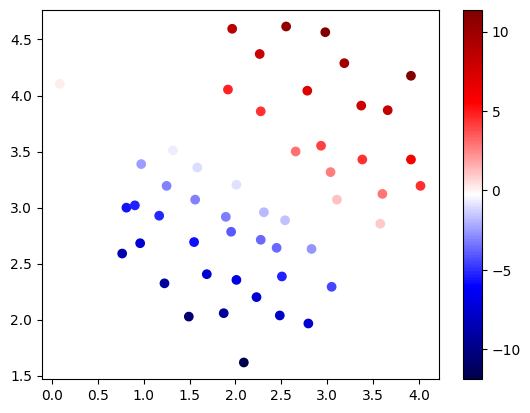

In [27]:
plt.scatter(df['x1'], df['x2'], c=conf_level, cmap='seismic')
plt.colorbar();

In [28]:
svc_2.coef_[0]

array([2.76362128, 7.0592924 ])

In [29]:
svc_2.intercept_[0]

-29.079426707465945

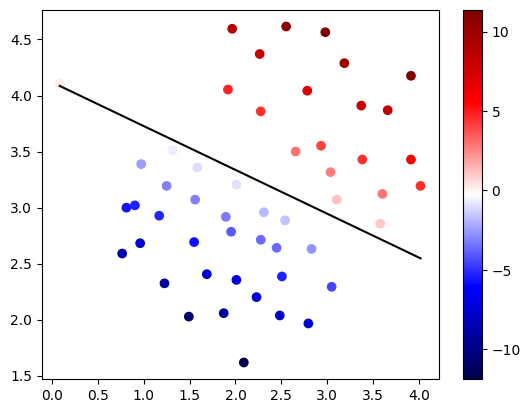

In [30]:
w = svc_2.coef_[0]
b = svc_2.intercept_[0]
x_points = df['x1'].sort_values()
y_points = -w[0]/w[1] * x_points - b/w[1]

plt.scatter(df['x1'], df['x2'], c=conf_level, cmap='seismic')
plt.plot(x_points, y_points, c='k')
plt.colorbar();

https://www.svm-tutorial.com/2015/06/svm-understanding-math-part-3/

Ahora vamos a pasar de un *SVM* lineal a uno que es capaz de realizar una clasificación no lineal utilizando *kernels*. Primero, tenemos la tarea de implementar una función de *kernel* gaussiano. Aunque scikit-learn tiene un *kernel* gaussiano incorporado, por transparencia vamos a implementar uno desde cero.

## Ejercicio 2

A continuación vamos a examinar otro conjunto de datos, esta vez con un límite de decisión no lineal.

#### 1. Carga los datos `ejer_1_data2.mat`

In [12]:
from scipy.io import loadmat
import pandas as pd
import seaborn as sns

In [13]:
mat = loadmat('data/ejer_1_data2.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:54 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0.107143 , 0.60307  ],
        [0.093318 , 0.649854 ],
        [0.0979263, 0.705409 ],
        ...,
        [0.975806 , 0.439474 ],
        [0.989631 , 0.425439 ],
        [0.996544 , 0.414912 ]]),
 'y': array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
       

In [33]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

#### 2. Crea un DataFrame con las variables explicativas y la variable objetivo

In [14]:
df = pd.DataFrame(mat['X'], columns=['x1','x2'])
df['y'] = mat['y']
df

,x1,x2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1
...,...,...,...
858,0.994240,0.516667,1
859,0.964286,0.472807,1
860,0.975806,0.439474,1
861,0.989631,0.425439,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      863 non-null    float64
 1   x2      863 non-null    float64
 2   y       863 non-null    uint8  
dtypes: float64(2), uint8(1)
memory usage: 14.5 KB


In [36]:
df.describe()

,x1,x2,y
count,863.000000,863.000000,863.000000
mean,0.503414,0.694304,0.556199
std,0.254967,0.158884,0.497120
min,0.044931,0.402632,0.000000
25%,0.292627,0.557018,0.000000
50%,0.512673,0.693713,1.000000
75%,0.699309,0.830409,1.000000
max,0.998848,0.988596,1.000000


In [37]:
df['y'].value_counts(normalize='true')

y
1    0.556199
0    0.443801
Name: proportion, dtype: float64

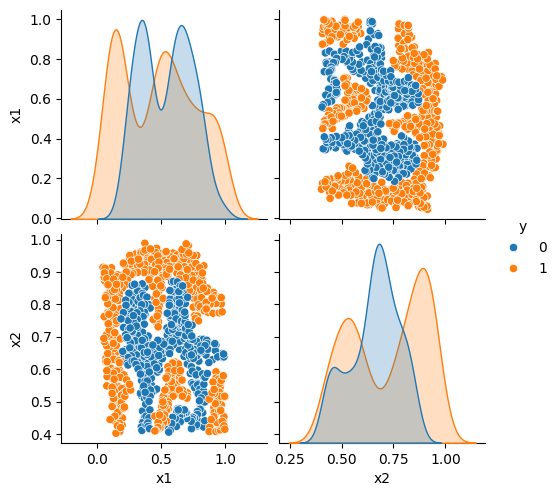

In [38]:
sns.pairplot(df, hue="y")

<Axes: >

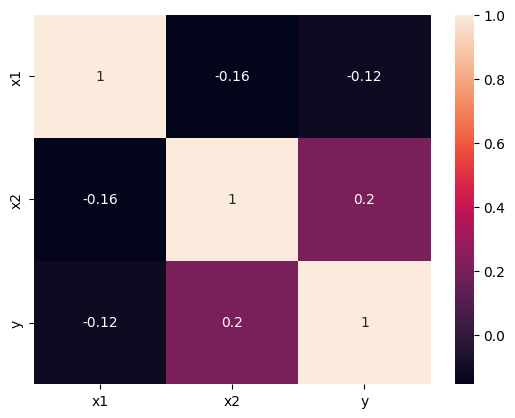

In [39]:
sns.heatmap(df.corr(), annot=True)

#### 3. Visualiza una gráfica de dispersión con los datos

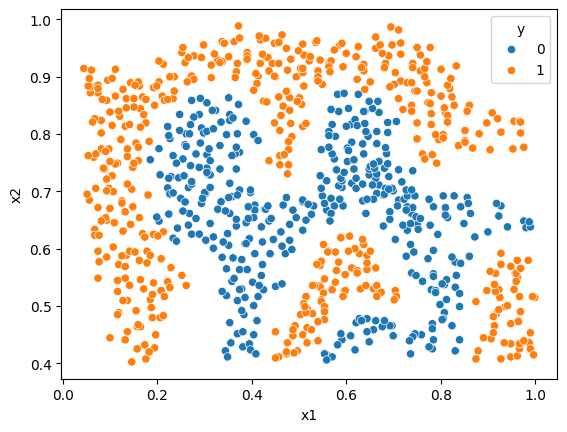

In [40]:
sns.scatterplot(data=df, x='x1', y='x2', hue="y");

Para este conjunto de datos construiremos un clasificador de máquina de vectores de soporte utilizando el núcleo RBF incorporado y examinaremos su precisión en los datos de entrenamiento. Para visualizar el límite de decisión, esta vez sombrearemos los puntos en función de la probabilidad prevista de que la instancia tenga una etiqueta de clase negativa. Veremos en el resultado que acierta en la mayoría de los casos.

#### 4. Declara un *SVC* con estos hiperparámetros
```Python
SVC(C=100, gamma=10, probability=True)
```

In [18]:
from sklearn.svm import SVC

svc = SVC(C=100, gamma=10, probability=True)

In [17]:
X = df[['x1','x2']]
y = df['y']

#### 5. Ajusta el clasificador y obten la bondad de ajuste del modelo

In [19]:
svc.fit(X,y)
svc.score(X,y)

0.9698725376593279

#### 6. Visualiza el diagrama de dispersión y la probabilidad de predecir 0 con [*sequential color*](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html)

In [44]:
y_pred_proba = svc.predict_proba(X)
y_pred_proba[:,0]

array([3.00000090e-14, 3.00000090e-14, 3.00000090e-14, 3.39045904e-07,
       4.29565975e-03, 1.00433039e-05, 3.98619388e-08, 8.14824078e-03,
       3.00000090e-14, 3.00000090e-14, 3.00000090e-14, 9.59467192e-03,
       2.75064516e-12, 3.00000090e-14, 3.00000090e-14, 1.49765451e-10,
       2.33951159e-01, 5.75651502e-01, 3.00000090e-14, 3.00000090e-14,
       1.12962661e-02, 5.67002623e-06, 6.60758352e-03, 1.08503072e-01,
       1.45435572e-02, 1.10546109e-06, 5.35838757e-07, 1.15049404e-07,
       1.63811318e-06, 1.83767085e-02, 1.45889158e-01, 2.28296633e-02,
       3.00000090e-14, 3.00000090e-14, 3.00000090e-14, 3.00000090e-14,
       3.00000090e-14, 9.37316440e-14, 1.23390221e-10, 3.00000090e-14,
       3.00000090e-14, 3.00000090e-14, 3.00000090e-14, 3.00000090e-14,
       3.00000090e-14, 3.00000090e-14, 3.00000090e-14, 5.20746788e-11,
       3.00000090e-14, 3.00000090e-14, 1.92499905e-09, 7.71751182e-08,
       5.59069825e-06, 3.00000090e-14, 3.00000090e-14, 3.00000090e-14,
      

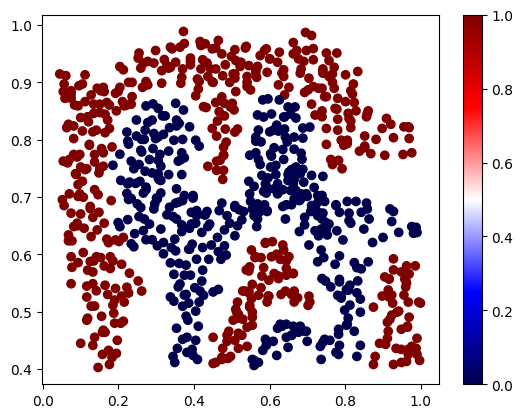

In [45]:
plt.scatter(df['x1'], df['x2'], c = y, cmap="seismic")
plt.colorbar()

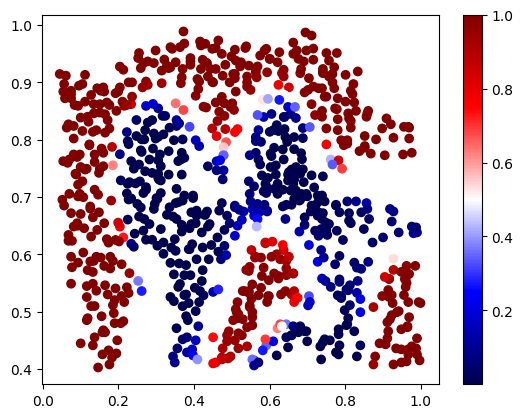

In [46]:
import matplotlib.pyplot as plt
plt.scatter(df['x1'], df['x2'], c = y_pred_proba[:,1], cmap="seismic")
plt.colorbar()

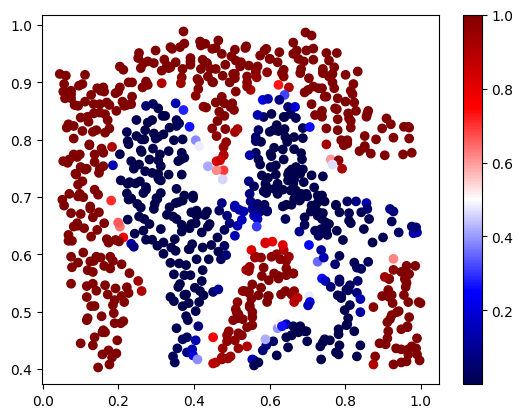

In [47]:

svc = SVC(C=1000, gamma=10, probability=True)
svc.fit(X,y)
y_pred_proba = svc.predict_proba(X)

plt.scatter(df['x1'], df['x2'], c = y_pred_proba[:,1], cmap="seismic")
plt.colorbar()


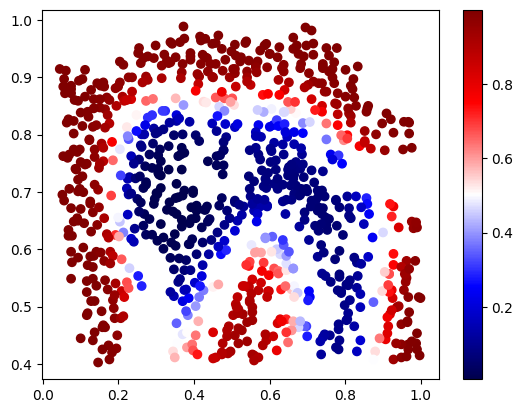

In [48]:

svc = SVC(C=1, gamma=10, probability=True)
svc.fit(X,y)
y_pred_proba = svc.predict_proba(X)

plt.scatter(df['x1'], df['x2'], c = y_pred_proba[:,1], cmap="seismic")
plt.colorbar()